In [ ]:
import pandas as pd

# Load the dataset with tab delimiter
file_path = '/content/marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

In [ ]:
print(data)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

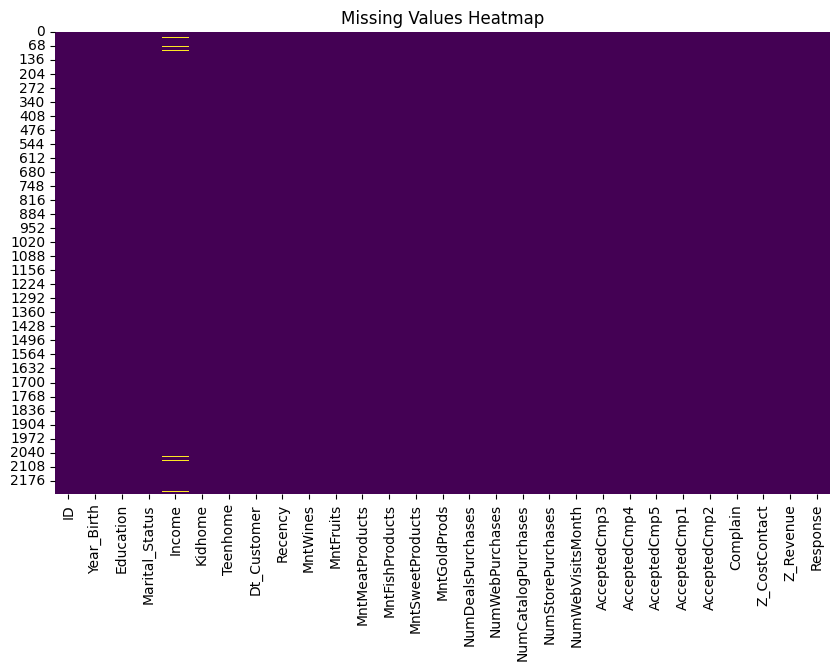

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

<ipython-input-104-252a1438c9fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(median_income, inplace=True)


In [ ]:
# Clean 'Dt_Customer' column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
# Check for duplicates and drop them if present
data.drop_duplicates(inplace=True)

In [ ]:
# Display a summary of the cleaned dataset
cleaned_info = {
    "missing_values": data.isnull().sum(),
    "duplicates": data.duplicated().sum(),
    "shape": data.shape
}

print("Data cleaning complete. Summary:")
print(cleaned_info)

Data cleaning complete. Summary:
{'missing_values': ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64, 'duplicates': 0, 'shape': (2240, 29)}


In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

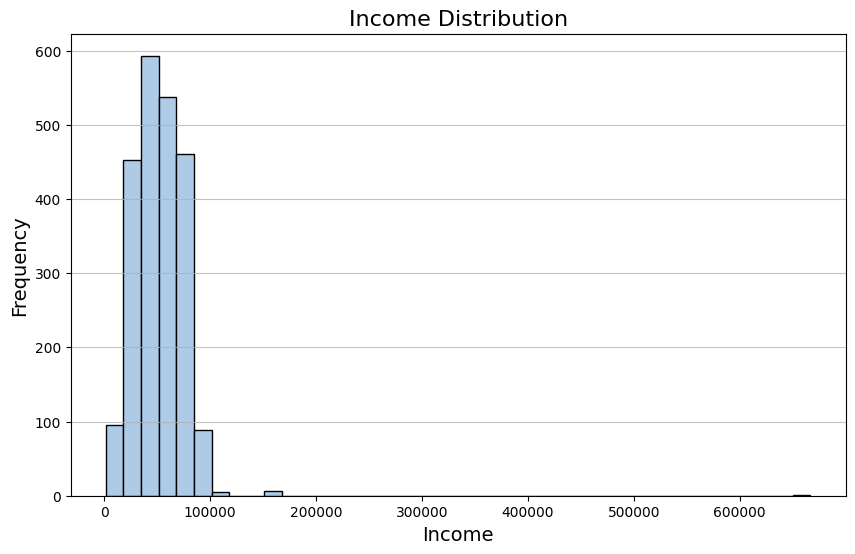

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the 'Income' column
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=40, color="#adcae6", edgecolor="black")
plt.title("Income Distribution", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


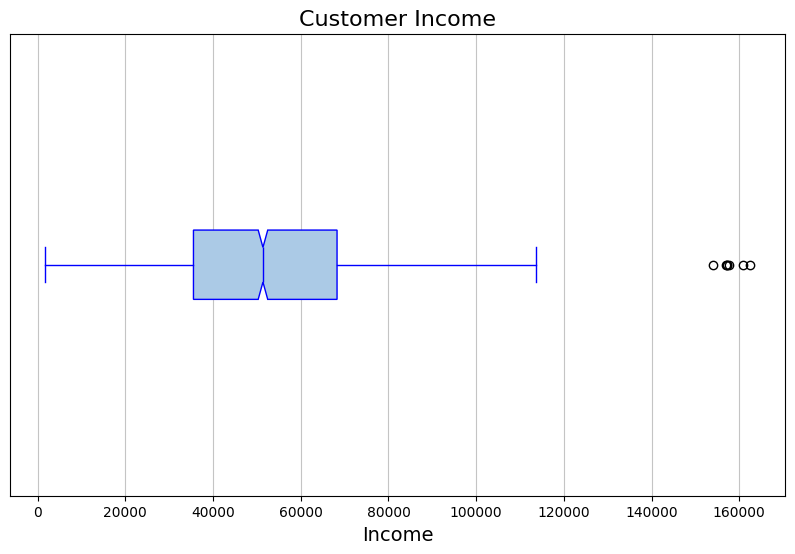

In [ ]:

# Filter income values less than 180000
filtered_income = data['Income'][data['Income'] < 180000]

# Create a boxplot for the filtered income values
plt.figure(figsize=(10, 6))
plt.boxplot(
    filtered_income,
    vert=False,  # Horizontal boxplot
    patch_artist=True,  # Fill the box with color
    notch=True,  # Add a notch to indicate the median confidence interval
    boxprops=dict(facecolor="#abcae6", color="blue"),  # Box color
    medianprops=dict(color="blue"),  # Median line color
    whiskerprops=dict(color="blue"),  # Whisker line color
    capprops=dict(color="blue")  # Cap line color
)
plt.title("Customer Income", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.yticks([])  # Removes the y-axis ticks
plt.grid(axis='x', alpha=0.75)
plt.show()

<ipython-input-111-8a0a83ddd214>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  eduplot = sns.boxplot(


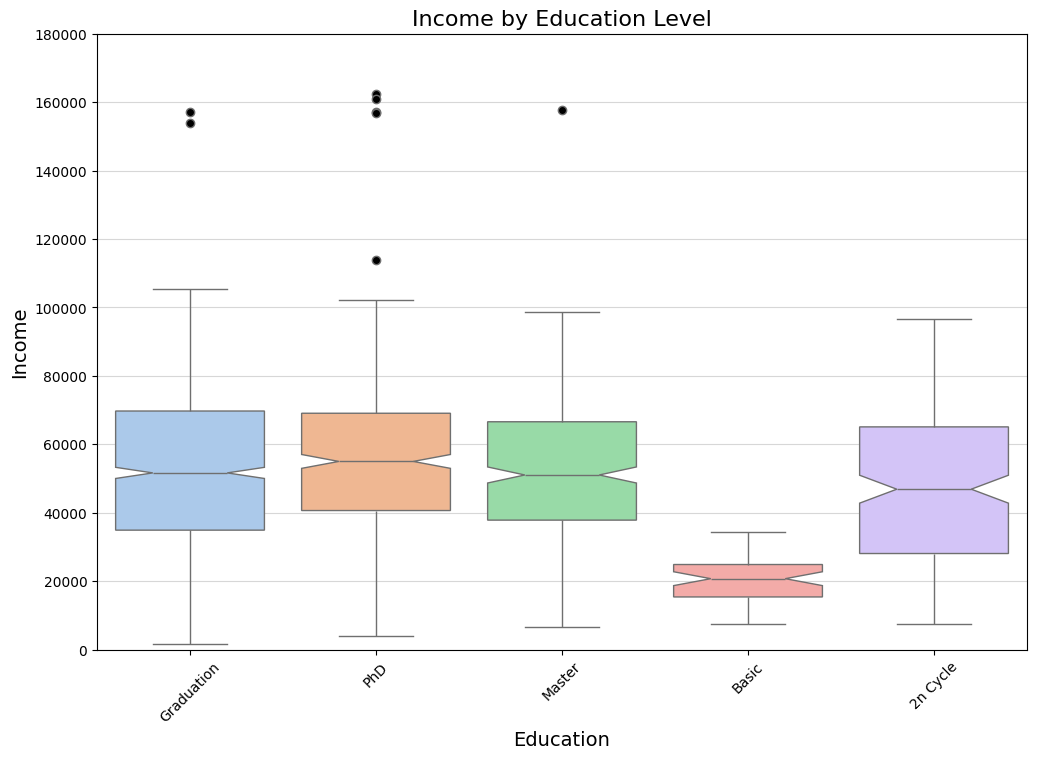

In [ ]:
# Create a boxplot for Education vs Income
plt.figure(figsize=(12, 8))
eduplot = sns.boxplot(
    x='Education',
    y='Income',
    data=data,
    notch=True,
    palette="pastel",
    showfliers=True,  # Include outliers
    flierprops={"marker": "o", "markerfacecolor": "black", "markersize": 6}
)

# Set limits and titles
plt.ylim(0, 180000)
plt.title("Income by Education Level", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

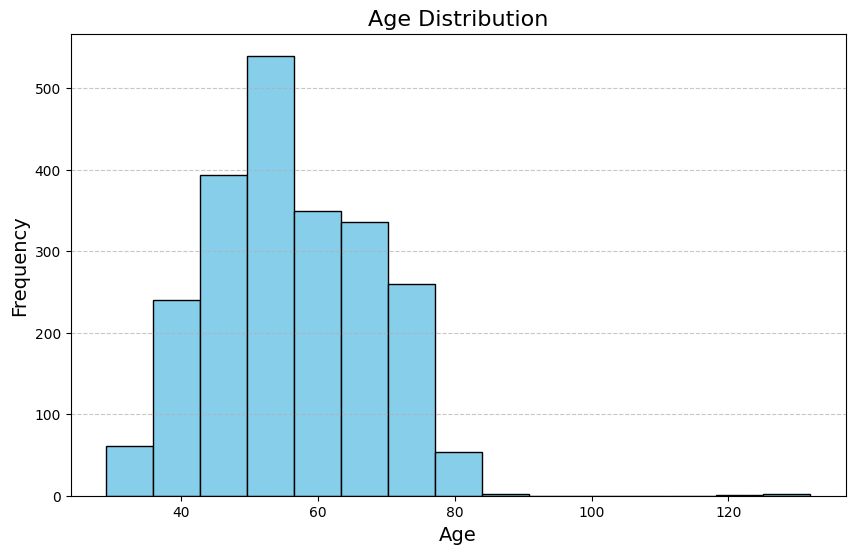

In [ ]:

# Calculate ages from the Year_Birth column
current_year = 2025  # Assuming the current year is 2025
data['Age'] = current_year - data['Year_Birth']

# Plot the histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


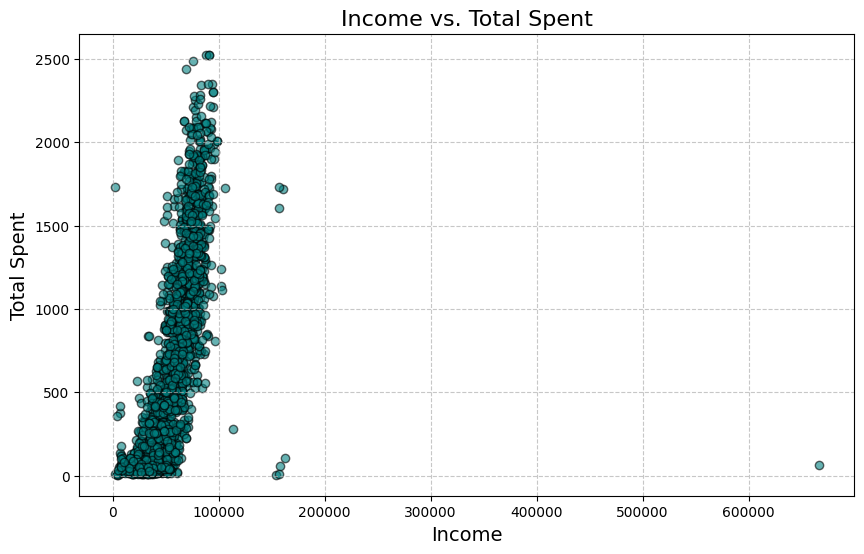

In [ ]:
# Calculate total spending from relevant columns
spending_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
data['Total_Spent'] = data[spending_columns].sum(axis=1)

# Plot the scatter plot of Income vs. Total Spent
plt.figure(figsize=(10, 6))
plt.scatter(data['Income'], data['Total_Spent'], alpha=0.6, color='teal', edgecolor='black')
plt.title('Income vs. Total Spent', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



In [ ]:
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']
target = 'Response'  # Or your desired target column


In [ ]:

# Splitting data into train and test sets using the original dataset
X = data[features]
y =data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.85


In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

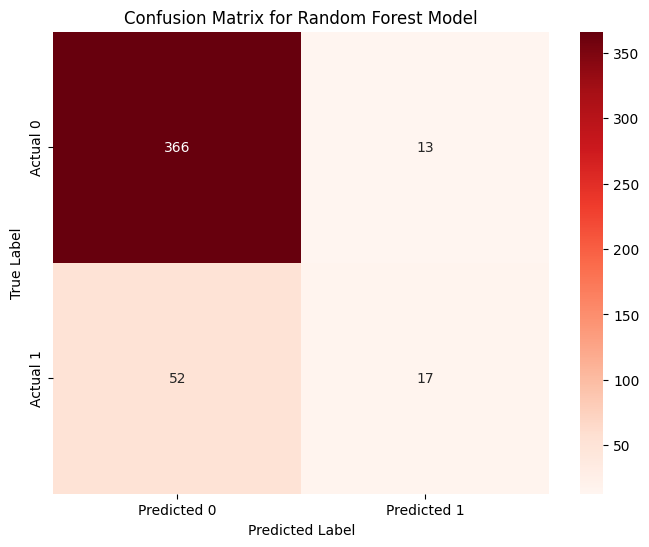

In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
file_path = '/content/marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

In [ ]:
# Recalculate Total_Spent from the original data
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
# Now use original_data to select your features and target
feature = 'Income'
target = 'Total_Spent'

In [ ]:
# Drop rows with missing values
data = data[[feature, target]].dropna()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences for LSTM
sequence_length = 10  # Adjust the length of each sequence
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # Use feature column
    y.append(scaled_data[i, 1])  # Use target column

X, y = np.array(X), np.array(y)

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(16),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20,validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict and inverse scale for interpretation
predictions = model.predict(X_test)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1434 - val_loss: 0.1320
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1196 - val_loss: 0.1307
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1277 - val_loss: 0.1301
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1356 - val_loss: 0.1474
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1359 - val_loss: 0.1293
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1223 - val_loss: 0.1290
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1177 - val_loss: 0.1292
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1132 - val_loss: 0.1301
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1264 - val_loss: 0.1301
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1194 - val_loss: 0.1306
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1237 - val_loss: 0.1282
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

# Make predictions
predictions = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1398
Test Loss (MSE): 0.12723520398139954
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R-squared: 0.02


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 15, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 15, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,881 (511.25 KB)

 Trainable params: 130,433 (509.50 KB)

 Non-trainable params: 448 (1.75 KB)

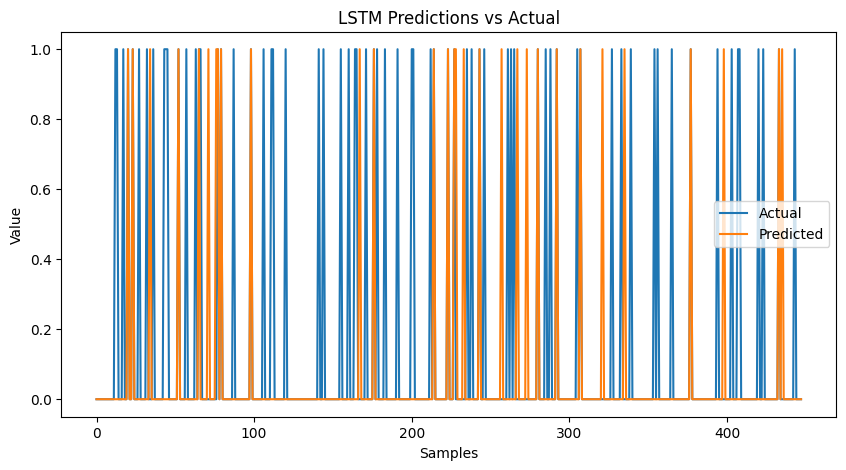

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.show()


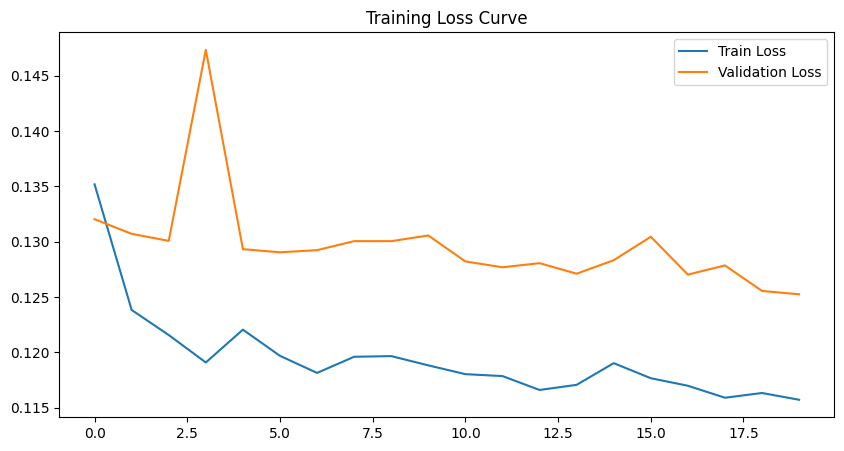

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss Curve')
plt.show()